In [1]:
import xarray as xr
import numpy
import dask
import dask.threaded
import dask.multiprocessing
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [3]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41877")
c=client

In [4]:
from dask.utils import ensure_dict, format_bytes
    
wk = c.scheduler_info()["workers"]

text="Workers= " + str(len(wk))
memory = [w["memory_limit"] for w in wk.values()]
cores = sum(w["nthreads"] for w in wk.values())
text += ", Cores=" + str(cores)
if all(memory):
    text += ", Memory=" + format_bytes(sum(memory))
print(text)

Workers= 4, Cores=16, Memory=187.53 GiB


In [9]:
dsU01=xr.open_mfdataset('/bettik/data-ocean/UVbottom-eNATL60noMEDdegrad4-BLBT02/*m01*Ubottom*',chunks={'x':1000,'y':1000,'time_counter':24})

/home/alberta/miniconda3/envs/jupyter/lib/python3.8/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/alberta/miniconda3/envs/jupyter/lib/python3.8/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

In [10]:
dsU01

<xarray.Dataset>
Dimensions:            (time_counter: 744, y: 1181, x: 1480, depthu: 1)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2010-01-01T00:30:00 ... ...
  * depthu             (depthu) float32 0.4805
Dimensions without coordinates: y, x
Data variables:
    degraded_vozocrtx  (time_counter, y, x) float32 dask.array<chunksize=(24, 1000, 1000), meta=np.ndarray>
    flsdc              (time_counter, y, x) float32 dask.array<chunksize=(744, 1000, 1000), meta=np.ndarray>
    nav_lat            (y, x, time_counter) float32 dask.array<chunksize=(1000, 1000, 24), meta=np.ndarray>
    nav_lon            (y, x, time_counter) float32 dask.array<chunksize=(1000, 1000, 24), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  2 21:04:52 2022: ncks -O -F -d x,1,1480 /work...
    NCO:               4.4.6

In [12]:
umean01=dsU01.degraded_vozocrtx.mean(dim='time_counter')

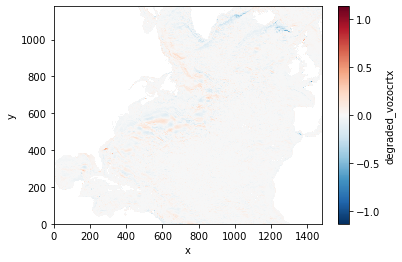

In [13]:
umean01.plot()